# Landreman and Paul QA configuration - finding a good set of modular coils

* QA configuration
* 4-field period
* Aspect ratio is 10
* Mean iota is 1.19

In [1]:
from simsopt.mhd import Vmec
from simsopt.geo import SurfaceRZFourier, CurveHelical
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib widget

In [2]:
v = Vmec('wout_LandremanPaul2021_QA.nc')
nfp = v.boundary.nfp

mpol=v.boundary.mpol
ntor=v.boundary.ntor

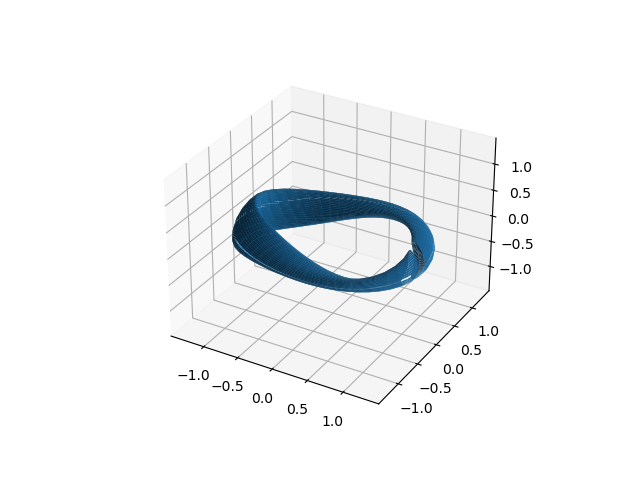

<Axes3D: >

In [3]:
v.boundary.plot()

In [4]:
nfp

2

In [5]:
v.aspect()

0.0

In [6]:
v.mean_iota()

0.4192898186345418

In [7]:
alpha = (444 / v.boundary.volume())**(1/3) # scale factor to match ku volume
alpha

9.229649839967937

In [8]:
scaled_boundary = SurfaceRZFourier( 
    nfp=nfp, stellsym=True, mpol=mpol, ntor=ntor, 
    quadpoints_phi=np.linspace(0,2*np.pi/nfp,128,endpoint=False),
    quadpoints_theta=np.linspace(0,2*np.pi,64,endpoint=False)
)

In [9]:
scaled_boundary.full_x = v.boundary.full_x * alpha

In [10]:
scaled_boundary.nfp

2

In [11]:
v.boundary = scaled_boundary

In [12]:
v2 = Vmec(verbose = True,   ntheta=50,  nphi=50, range_surface='full torus')

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
  VMEC OUTPUT FILES ALREADY EXIST: OVERWRITING THEM ...
  SEQ =    1 TIME SLICE  0.0000E+00
  PROCESSING INPUT.default
  THIS IS PARVMEC (PARALLEL VMEC), VERSION 9.0
  Lambda: Full Radial Mesh. L-Force: hybrid full/half.

  COMPUTER: arm64-apple-darwin20.0.0   OS:    RELEASE:   DATE = Dec 13,2023  TIME = 13:47:34


In [13]:
v2.indata.nfp

5

In [14]:
v2.boundary = scaled_boundary
v2.need_to_run_code = True
v2.run()


  NS =   13 NO. FOURIER MODES =   41 FTOLV =  1.000E-10 NITER =   3000
  PROCESSOR COUNT - RADIAL:    1
 INITIAL JACOBIAN CHANGED SIGN!
 TRYING TO IMPROVE INITIAL MAGNETIC AXIS GUESS
  ---- Improved AXIS Guess ----
      RAXIS_CC =    9.4617710381806468        1.6369239465993992       0.22120775204955428       -3.3959708574584561E-003  -1.3045475606033545E-002
      ZAXIS_CS =   -0.0000000000000000       -1.5371408181533477      -0.15959582769071293        5.7674262706750598E-004   3.7601532008280825E-003
  -----------------------------

  ITER    FSQR      FSQZ      FSQL    RAX(v=0)    DELT       WMHD

    1  1.61E-02  1.17E-02  6.49E-03  1.130E+01  5.00E-01  4.3692E+00
  200  4.58E-08  5.48E-09  1.40E-08  1.125E+01  5.00E-01  4.3418E+00
  400  3.34E-09  1.48E-09  3.57E-09  1.120E+01  5.00E-01  4.3418E+00
  600  1.76E-10  3.34E-11  6.61E-11  1.120E+01  5.00E-01  4.3418E+00
  640  9.96E-11  1.66E-11  2.27E-11  1.119E+01  5.00E-01  4.3418E+00

 EXECUTION TERMINATED NORMALLY

 FILE : de

In [15]:
v2.write_input('input.landreman_paul_qa_scaled')

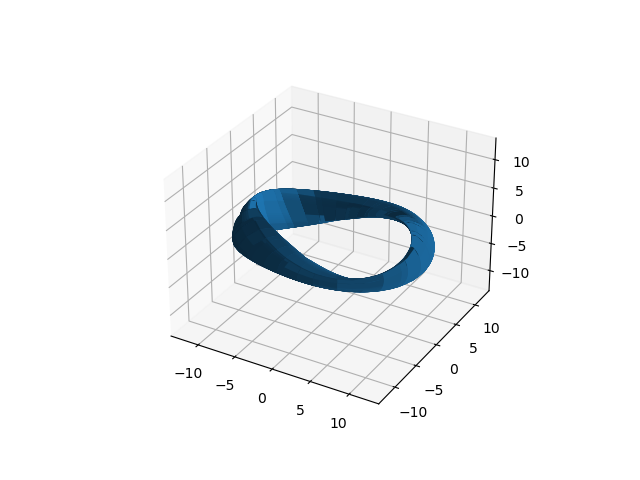

<Axes3D: >

In [16]:
v2.boundary.plot()

In [17]:
v2.boundary.nfp

2

In [18]:
v2.wout.nfp

2